# Bibliotecas

Primeiro, vamos importar as bibliotecas necessárias e renomeá-las para facilitar o uso em nosso código. A seguir, temos uma breve descrição de cada biblioteca:

- **NumPy** (renomeada como `np`): Biblioteca que fornece suporte para arrays multidimensionais e funções matemáticas eficientes para manipulação de grandes conjuntos de dados numéricos.
- **Matplotlib** (renomeada como `plt`): Biblioteca utilizada para a criação de gráficos e visualizações de dados. Ela oferece uma ampla gama de opções para gerar gráficos 2D, como linhas, barras, dispersões, histogramas, entre outros.
- **SciPy** (renomeada como curve_fit): Função da biblioteca SciPy usada para realizar ajustes de curvas aos dados experimentais, utilizando o método de mínimos quadrados não-lineares, permitindo modelar dados e encontrar os parâmetros ideais de uma função.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Atividade mínima

## Estimativa de π por meio de monte carlo (1)

In [2]:
# Função para estimar o valor de π usando o método de Monte Carlo
def pi_monte_carlo(N):
    '''
    Estima o valor de π usando o método de Monte Carlo.

    Parâmetros:
    N (int): número de pontos aleatórios a serem gerados.

    Retorna:
    float: estimativa do valor de π.
    '''
    # Inicializar o gerador de números aleatórios
    rng = np.random.default_rng()

    dentro_do_circulo = 0

    for _ in range(N):
        # Gerar pontos aleatórios dentro do quadrado [0, 1] x [0, 1]
        x = rng.uniform(0, 1)
        y = rng.uniform(0, 1)

        # Verificar se o ponto está dentro do círculo
        if x**2 + y**2 <= 1:
            dentro_do_circulo += 1

    # Estimativa de π
    estimativa_pi = 4 * dentro_do_circulo / N
    return estimativa_pi

# pi = 3.14159265359

N = 1000000
estimativa = pi_monte_carlo(N)
print(f'Estimativa de π com {N} pontos: {estimativa}')

Estimativa de π com 1000000 pontos: 3.140584


## Mapa logístico, caos e fractais (1)

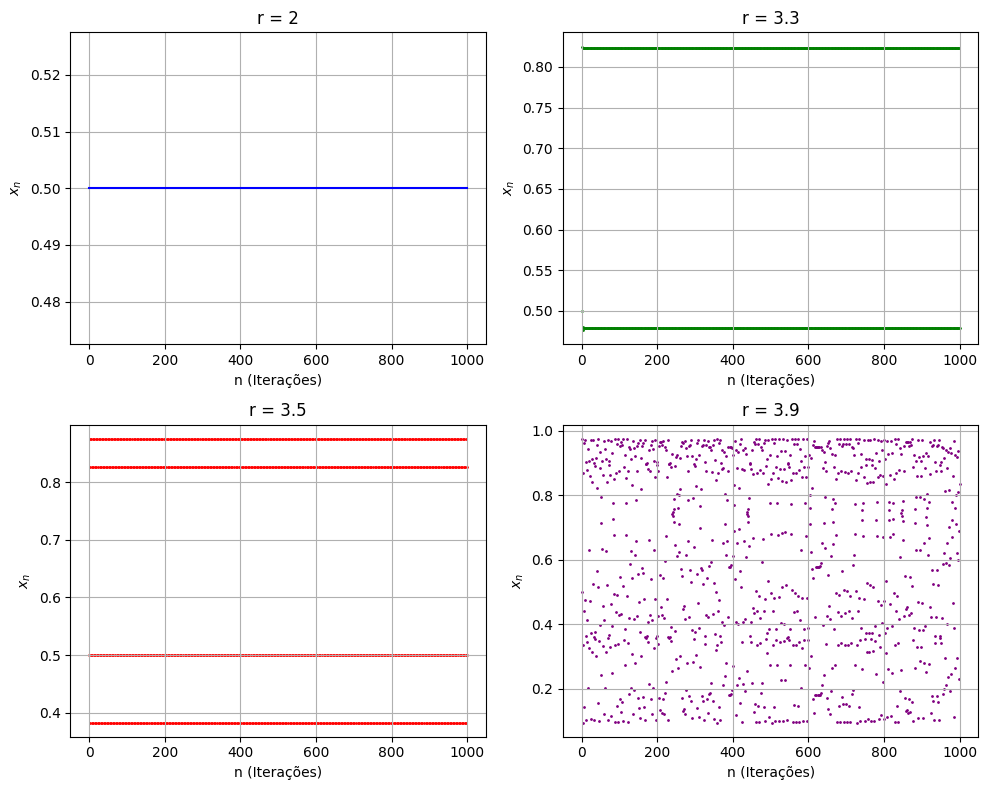

In [3]:
# Função que implementa o mapa logístico
def mapa_logistico(r, x0, N):
    """
    Função que implementa o mapa logístico, um modelo matemático usado para descrever
    o crescimento populacional em sistemas dinâmicos.

    O mapa logístico é definido pela equação recursiva:
    x_{n+1} = r * x_n * (1 - x_n), onde:
        - r é o parâmetro de crescimento populacional,
        - x0 é o valor inicial da população (condição inicial),
        - N é o número de iterações a ser calculado.

    A função retorna uma lista com os valores de x de cada iteração, começando de x0 até o N-ésimo valor gerado.

    Parâmetros:
    r (float): O parâmetro de crescimento populacional, que deve estar em um intervalo de 0 a 4.
    x0 (float): O valor inicial da população, geralmente entre 0 e 1.
    N (int): O número de iterações do mapa logístico.

    Retorna:
    list: Lista com os valores de x para cada iteração, do valor inicial x0 até o valor x_N.
    """
    # Inicializa a lista com o valor inicial x_0
    x = [x0]
    for n in range(1, N+1):
        x_n = r * x[-1] * (1 - x[-1])  # Aplica a equação do mapa logístico
        x.append(x_n)
    return x

# Parâmetros para os gráficos
r_values = [2, 3.3, 3.5, 3.9]
x0 = 0.5  # Condição inicial
N = 1000  # Número de iterações

# Criando os gráficos
plt.figure(figsize=(10, 8))

# Gráfico para r = 2
plt.subplot(2, 2, 1)
x_vals = mapa_logistico(2, x0, N)
plt.plot(x_vals, label=r"$r = 2$", color='blue')
plt.title("r = 2")
plt.xlabel("n (Iterações)")
plt.ylabel(r"$x_n$")
plt.grid(True)

# Gráfico para r = 3.3
plt.subplot(2, 2, 2)
x_vals = mapa_logistico(3.3, x0, N)
plt.scatter(range(N+1), x_vals, label=r"$r = 3.3$", color='green', s=1)
plt.title("r = 3.3")
plt.xlabel("n (Iterações)")
plt.ylabel(r"$x_n$")
plt.grid(True)

# Gráfico para r = 3.5
plt.subplot(2, 2, 3)
x_vals = mapa_logistico(3.5, x0, N)
plt.scatter(range(N+1), x_vals, label=r"$r = 3.5$", color='red', s=1)
plt.title("r = 3.5")
plt.xlabel("n (Iterações)")
plt.ylabel(r"$x_n$")
plt.grid(True)

# Gráfico para r = 3.9
plt.subplot(2, 2, 4)
x_vals = mapa_logistico(3.9, x0, N)
plt.scatter(range(N+1), x_vals, label=r"$r = 3.9$", color='purple', s=1)
plt.title("r = 3.9")
plt.xlabel("n (Iterações)")
plt.ylabel(r"$x_n$")
plt.grid(True)

# Exibir os gráficos
plt.tight_layout()
plt.show()

# Atividades intermediárias

## Estimativa de π por meio de monte carlo (2)

Estimativa de π com 1000000 pontos: 3.1413


/home/user/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


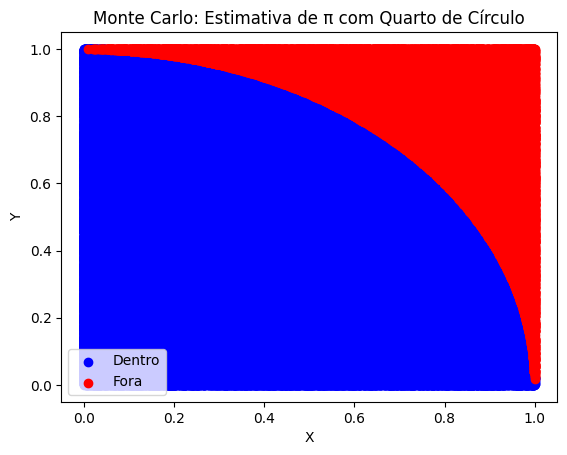

In [4]:
def pi_monte_carlo(N, retorna_pontos = False):
    '''
    Estima o valor de π usando o método de Monte Carlo.

    Parâmetros:
    N (int): número de pontos aleatórios a serem gerados.

    Retorna:
    float: estimativa do valor de π.
    '''
    # Inicializar o gerador de números aleatórios
    rng = np.random.default_rng()

    dentro_do_circulo = 0

    dentro = ([])
    fora = ([])

    for _ in range(N):
        # Gerar pontos aleatórios dentro do quadrado [0, 1] x [0, 1]
        x = rng.uniform(0, 1)
        y = rng.uniform(0, 1)

        # Verificar se o ponto está dentro do círculo
        if x**2 + y**2 <= 1:
            dentro_do_circulo += 1
            dentro.append((x,y))
        else:
            fora.append((x,y))

    # Estimativa de π
    estimativa_pi = 4 * dentro_do_circulo / N

    #Saida

    if retorna_pontos:
        return estimativa_pi, dentro, fora
    else:
        return estimativa_pi
    
N = 1000000

#Para retorna_pontos = False
estimativa = pi_monte_carlo(N,False)
print(f'Estimativa de π com {N} pontos: {estimativa}')

#Para retorna_pontos = True
estimativa = pi_monte_carlo(N,True)

#grafico com pontos dentro e fora
plt.scatter(*zip(*estimativa[1]), color='blue' , label='Dentro')
plt.scatter(*zip(*estimativa[2]), color='red' , label='Fora')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Monte Carlo: Estimativa de π com Quarto de Círculo')
plt.legend()
plt.show()

## Mapa logístico, caos e fractais (2)

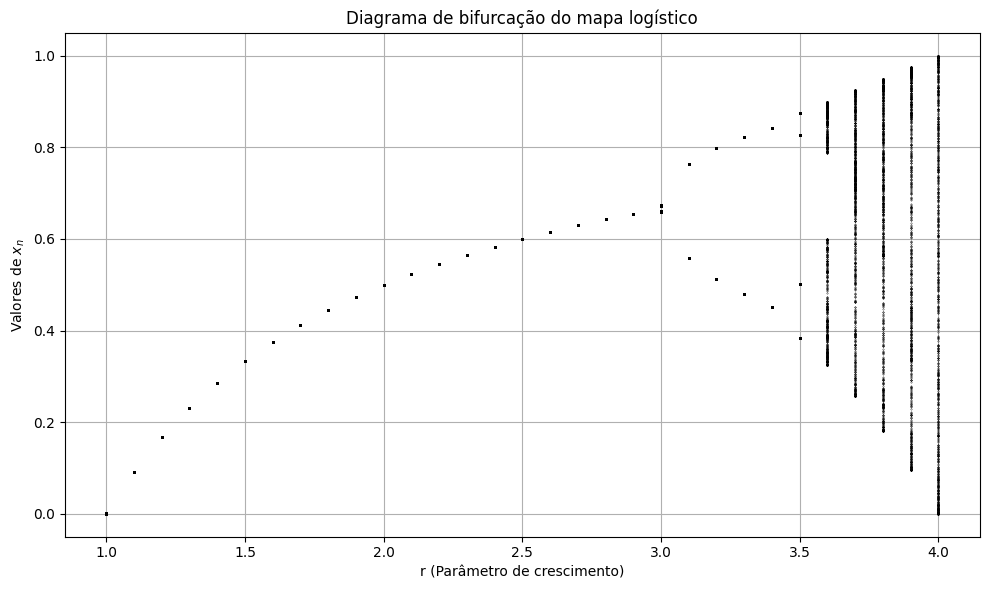

In [5]:
def mapa_logistico(r, x0, N):
    """
    Função que implementa o mapa logístico, um modelo matemático usado para descrever
    o crescimento populacional em sistemas dinâmicos.

    O mapa logístico é definido pela equação recursiva:
    x_{n+1} = r * x_n * (1 - x_n), onde:
        - r é o parâmetro de crescimento populacional,
        - x0 é o valor inicial da população (condição inicial),
        - N é o número de iterações a ser calculado.

    A função retorna uma lista com os valores de x de cada iteração, começando de x0 até o N-ésimo valor gerado.

    Parâmetros:
    r (float): O parâmetro de crescimento populacional, que deve estar em um intervalo de 0 a 4.
    x0 (float): O valor inicial da população, geralmente entre 0 e 1.
    N (int): O número de iterações do mapa logístico.

    Retorna:
    list: Lista com os valores de x para cada iteração, do valor inicial x0 até o valor x_N.
    """
    # Inicializa a lista com o valor inicial x_0
    x = [x0]
    for n in range(1, N+1):
        x_n = r * x[-1] * (1 - x[-1])  # Aplica a equação do mapa logístico
        x.append(x_n)
    return x


# Parâmetros
N = 2000  # Número total de iterações
M = 1000  # Últimos M valores

# Intervalo de r de 1 até 4 com passos de 0.1
r_values = np.arange(1, 4.1, 0.1)
x0 = 0.1  # Condição inicial

#r_values = np.linspace(1, 4, 400)

# Plotando os gráficos
plt.figure(figsize=(10, 6))

for r in r_values:
    # Gerar os valores do mapa logístico
    xn = mapa_logistico(r, x0, N)

    # Plotar os últimos M valores
    plt.plot(r * np.ones(M), xn[-M:], 'k.', markersize=0.5)

# Configurações de aparência do gráfico
plt.xlabel("r (Parâmetro de crescimento)")
plt.ylabel("Valores de $x_n$")
plt.title("Diagrama de bifurcação do mapa logístico")
plt.grid(True)
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Atividade avançada

## Estimativa de π por meio de monte carlo (3)

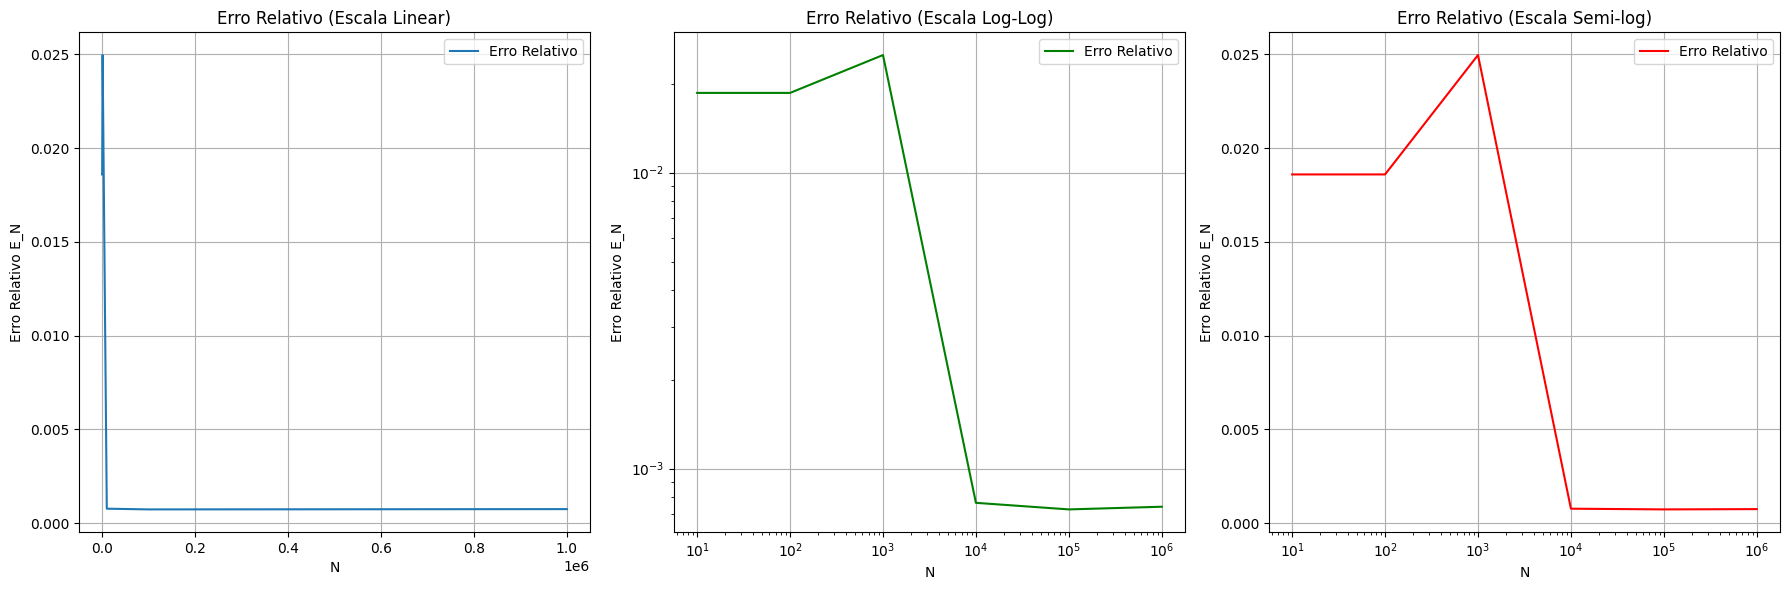

Ajuste feito: E_N ~ 0.0323 * N^-0.1516


In [6]:
def pi_monte_carlo(N):
    '''
    Estima o valor de π usando o método de Monte Carlo.

    Parâmetros:
    N (int): número de pontos aleatórios a serem gerados.

    Retorna:
    float: estimativa do valor de π.
    '''
    # Inicializar o gerador de números aleatórios
    rng = np.random.default_rng()

    dentro_do_circulo = 0

    for _ in range(N):
        # Gerar pontos aleatórios dentro do quadrado [0, 1] x [0, 1]
        x = rng.uniform(0, 1)
        y = rng.uniform(0, 1)

        # Verificar se o ponto está dentro do círculo
        if x**2 + y**2 <= 1:
            dentro_do_circulo += 1

    # Estimativa de π
    estimativa_pi = 4 * dentro_do_circulo / N
    return estimativa_pi

# Função para calcular o erro relativo
def erro_relativo(estimativa_pi):
    """
    Calcula o erro relativo entre uma estimativa de pi e o valor verdadeiro de pi.

    Parâmetros:
    estimativa_pi (float): A estimativa do valor de pi.

    Retorna:
    float: O erro relativo entre a estimativa e o valor verdadeiro de pi.
    """
    return np.abs(np.pi - estimativa_pi) / np.pi


# Valores de N para simulações
valores_N = [10**i for i in range(1, 7)]  # N = 10, 100, 1000, 10000, 100000, 1000000

# Calcular erro relativo para cada N
erros = [erro_relativo(pi_monte_carlo(N)) for N in valores_N]

def func_ajuste(x, a, b):
    """
    Função de ajuste para modelar a relação entre o erro relativo (E_N) e o número de pontos (N).
    A função assume a forma E_N ~ a * N^b, onde 'a' e 'b' são os parâmetros de ajuste.

    Parâmetros:
    x (float ou array): Valores de N (número de pontos).
    a (float): Parâmetro de escala do ajuste.
    b (float): Expoente do ajuste.

    Retorna:
    float ou array: Valor do erro relativo estimado com base nos parâmetros de ajuste.
    """
    return a * x**b


# Ajuste dos dados
params, _ = curve_fit(func_ajuste, valores_N, erros)
a, b = params

# Gráficos
plt.figure(figsize=(18, 6))

# 1. Gráfico Linear
plt.subplot(1, 3, 1)
# 'plt.plot' cria um gráfico com escalas lineares para ambos os eixos (x e y)
plt.plot(valores_N, erros, label='Erro Relativo')
plt.xlabel('N')
plt.ylabel('Erro Relativo E_N')
plt.title('Erro Relativo (Escala Linear)')
plt.grid(True)
plt.legend()

# 2. Gráfico Log-Log
plt.subplot(1, 3, 2)
# 'plt.loglog' cria um gráfico onde ambos os eixos (x e y) têm escala logarítmica.
plt.loglog(valores_N, erros, label='Erro Relativo', color='green')
plt.xlabel('N')
plt.ylabel('Erro Relativo E_N')
plt.title('Erro Relativo (Escala Log-Log)')
plt.grid(True)
plt.legend()

# 3. Gráfico Semi-log (log de E_N)
plt.subplot(1, 3, 3)
# 'plt.semilogx' cria um gráfico onde o eixo x é logarítmico e o eixo y permanece linear.
plt.semilogx(valores_N, erros, label='Erro Relativo', color='red')
plt.xlabel('N')
plt.ylabel('Erro Relativo E_N')
plt.title('Erro Relativo (Escala Semi-log)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Imprimir parâmetros do ajuste
print(f"Ajuste feito: E_N ~ {a:.4f} * N^{b:.4f}")

## Estimativa de π por meio de monte carlo (4)

In [7]:
def pi_monte_carlo(N):
    '''
    Estima o valor de π usando o método de Monte Carlo.

    Parâmetros:
    N (int): número de pontos aleatórios a serem gerados.

    Retorna:
    float: estimativa do valor de π.
    '''
    # Inicializar o gerador de números aleatórios
    rng = np.random.default_rng()

    dentro_do_circulo = 0

    for _ in range(N):
        # Gerar pontos aleatórios dentro do quadrado [0, 1] x [0, 1]
        x = rng.uniform(0, 1)
        y = rng.uniform(0, 1)

        # Verificar se o ponto está dentro do círculo
        if x**2 + y**2 <= 1:
            dentro_do_circulo += 1

    # Estimativa de π
    estimativa_pi = 4 * dentro_do_circulo / N
    return estimativa_pi

In [8]:
def pi_monte_carlo_vetor(N):
    '''
    Estima o valor de π usando o método de Monte Carlo com operações vetorizadas.

    Parâmetros:
    N (int): número de pontos aleatórios a serem gerados.
    retorna_pontos (bool): se True, retorna os pontos dentro e fora do círculo.

    Retorna:
    float: estimativa do valor de π.
    '''
    # Gerar pontos aleatórios para x e y
    x = np.random.uniform(0, 1, N)
    y = np.random.uniform(0, 1, N)

    # Calcular a condição de estar dentro do círculo (x^2 + y^2 <= 1)
    dentro_do_circulo = (x**2 + y**2) <= 1

    # Estimativa de π
    estimativa_pi = 4 * np.sum(dentro_do_circulo) / N

    # Retornar os resultados
    return estimativa_pi

In [9]:
# Teste de tempo de execução para a versão com loops e ifs
N = 1000000
%timeit pi_monte_carlo(N)

# Teste de tempo de execução para a versão vetorizada
%timeit pi_monte_carlo_vetor(N)

6.78 s ± 67.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
44.1 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Mapa logístico, caos e fractais (3)